## Espectros

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from __future__ import division
from deltasigma import *

import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings(action='ignore')

In [6]:
OSR = 100
order = 1
H = synthesizeNTF(order, OSR, 1)
pretty_lti(H)

'   (z - 1)    \n--------------\n (z - 0.3333) '

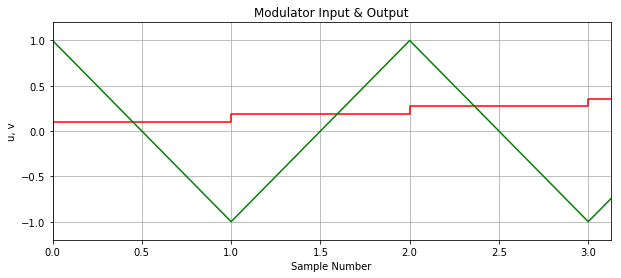

In [12]:
figure(figsize=(10, 4))
N = 8192
fB = int(np.ceil(N/(2.*OSR)))
ftest = np.floor(.4*fB)

def periodic_f(x):# original: sin(x)
    return np.sin(ftest*x)

u = 0.5*periodic_f(2*np.pi*ftest/N*np.arange(N))
v, xn, xmax, y = simulateDSM(u, H)
t = np.arange(50)
step(t, u[t],'r')
hold(True)
plot(t, v[t], 'g')
plt.grid(True)
axis([0, 50/ftest, -1.2, 1.2])
xlabel('Sample Number')
ylabel('u, v')
title('Modulator Input & Output');

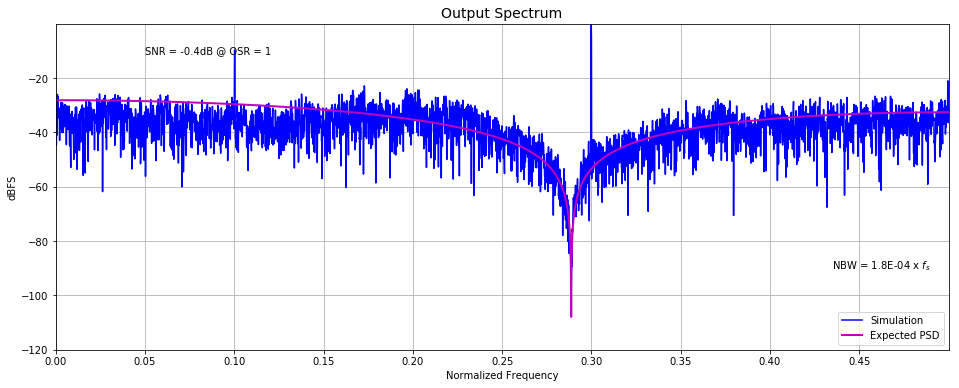

In [30]:
f = np.linspace(0, 0.5, N//2 + 1)
spec = np.fft.fft(v * ds_hann(N))/(N/4)
plot(f, dbv(spec[:N//2 + 1]),'b', label='Simulation')
figureMagic([0, 0.5], 0.05, None, [-120, 0], 20, None, (16, 6), 'Output Spectrum')
xlabel('Normalized Frequency')
ylabel('dBFS')

snr = calculateSNR(spec[2:fB+1], ftest - 2)
text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' % (snr, OSR), verticalalignment='center')
NBW = 1.5/N
Sqq = 4*evalTF(H, np.exp(2j*np.pi*f)) ** 2/3.
hold(True)
plot(f, dbp(Sqq * NBW), 'm', linewidth=2, label='Expected PSD')
text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
legend(loc=4);


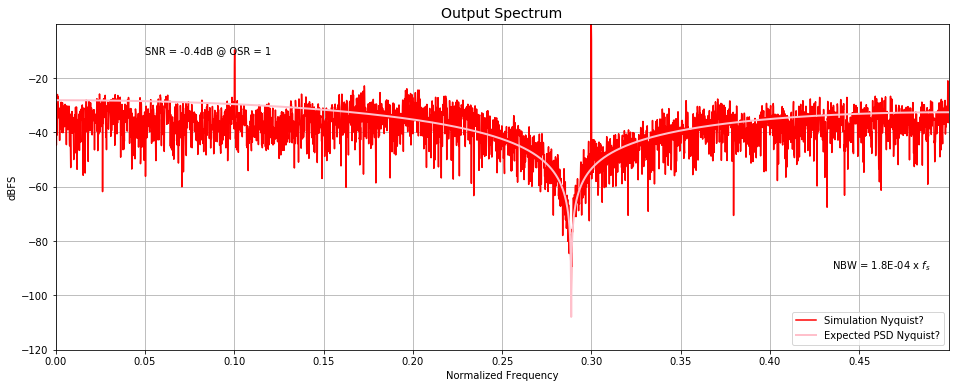

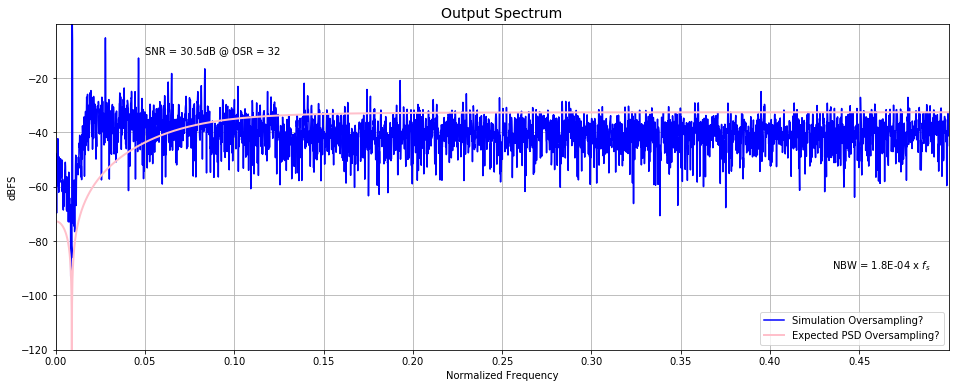

In [38]:
OSR = 1 # =1 Nyquist
order = 2
H = synthesizeNTF(order, OSR, 1)

figure(figsize=(20, 4))
N = 8192
fB = int(np.ceil(N/(2.*OSR)))
ftest = np.floor(0.6*fB)

def periodic_f(x):# original: sin(x)
    return np.cos(3*x)+2*np.sin(x)

u = 0.5*periodic_f(2*np.pi*ftest/N*np.arange(N))
v, xn, xmax, y = simulateDSM(u, H)
# t = np.arange(301)


f = np.linspace(0, 0.5, N//2 + 1)
spec = np.fft.fft(v * ds_hann(N))/(N/4)
plot(f, dbv(spec[:N//2 + 1]),'r', label='Simulation Nyquist?')
figureMagic([0, 0.5], 0.05, None, [-120, 0], 20, None, (16, 6), 'Output Spectrum')
xlabel('Normalized Frequency')
ylabel('dBFS')

snr = calculateSNR(spec[2:fB+1], ftest - 2)
text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' % (snr, OSR), verticalalignment='center')
NBW = 1.5/N
Sqq = 4*evalTF(H, np.exp(2j*np.pi*f)) ** 2/3.
hold(True)
plot(f, dbp(Sqq * NBW), 'pink', linewidth=2, label='Expected PSD Nyquist?')
text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
legend(loc=4);

#---

OSR = 32 # =1 Nyquist
order = 2
H = synthesizeNTF(order, OSR, 1)

figure(figsize=(20, 4))
N = 8192
fB = int(np.ceil(N/(2.*OSR)))
ftest = np.floor(0.6*fB)

def periodic_f(x):# original: sin(x)
    return np.cos(3*x)+2*np.sin(x)

u = 0.5*periodic_f(2*np.pi*ftest/N*np.arange(N))
v, xn, xmax, y = simulateDSM(u, H)
# t = np.arange(301)


f = np.linspace(0, 0.5, N//2 + 1)
spec = np.fft.fft(v * ds_hann(N))/(N/4)
plot(f, dbv(spec[:N//2 + 1]),'b', label='Simulation Oversampling?')
figureMagic([0, 0.5], 0.05, None, [-120, 0], 20, None, (16, 6), 'Output Spectrum')
xlabel('Normalized Frequency')
ylabel('dBFS')

snr = calculateSNR(spec[2:fB+1], ftest - 2)
text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' % (snr, OSR), verticalalignment='center')
NBW = 1.5/N
Sqq = 4*evalTF(H, np.exp(2j*np.pi*f)) ** 2/3.
hold(True)
plot(f, dbp(Sqq * NBW), 'pink', linewidth=2, label='Expected PSD Oversampling?')
text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
legend(loc=4);



## NTF

In [24]:
f_sampling = 
T = 1/f_sampling
z = np.exp(2j*np.pi*f*T)
print(z)

(1-2.4492935982947064e-16j)
